In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.model_selection import train_test_split
import random

In [3]:
#image folder path 
train_path = 'train'
test_path = 'test'
resol = 64

# Method for uploadind train and test data

In [4]:
def datasetUpload(img_path, img_dict):
    #initialize datasets (no content yet)
    x_set = None
    y_set = None

    #for each key in the dictionary parameter
    for key in img_dict:

        #for i = 0 to dictionary value
        for i in range(img_dict[key]):

            #check if file exists (if it doesn't, it goes to the next i)
            if os.path.exists(img_path + "{0}_{1}.jpg".format(key, i+1)):

                #opening image in the image location parameter
                img_raw = Image.open(img_path + "{0}_{1}.jpg".format(key, i+1))
                img_raw = img_raw.convert('RGB')
                img_resized = img_raw.resize((64, 64))

                #adding to x_train
                if x_set is None:
                    x_set = img_resized

                else:
                    x_set = np.concatenate((x_set, img_resized))


                #adding to y_train
                if y_set is None:

                    #check key for classification of image
                    if key == "apple":
                        y_set = np.array([[1, 0, 0, 0]])

                    if key == "banana":
                        y_set = np.array([[0, 1, 0, 0]])

                    if key == "orange":
                        y_set = np.array([[0, 0, 1, 0]])

                    if key == "mixed":
                        y_set = np.array([[0, 0, 0, 1]])

                else:
                    #check key
                    if key == "apple":
                        y_set = np.concatenate((y_set, [[1, 0, 0, 0]]))

                    if key == "banana":
                        y_set = np.concatenate((y_set, [[0, 1, 0, 0]]))

                    if key == "orange":
                        y_set = np.concatenate((y_set, [[0, 0, 1, 0]]))

                    if key == "mixed":
                        y_set = np.concatenate((y_set, [[0, 0, 0, 1]]))
    
    #output is the array of images (x_set) and their classification (y_set)
    return x_set, y_set

In [5]:
img_path_train = "train/"

#dictionary input (key = classification, value = number of files to read)
img_train_dict = {"apple": 76,
                "banana" : 76,
                "mixed" : 20,
                "orange" : 76
                }

#run user-defined upload code above
x_train, y_train = datasetUpload(img_path_train, img_train_dict)

#need to reshape dataset to accomodate RGB colorset (3 = RGB, 1 = Grayscale)
x_train = x_train.reshape(-1, 64, 64, 3) 
x_train.shape  

C:\Users\aksha\miniconda3\envs\tf\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


(240, 64, 64, 3)

C:\Users\aksha\miniconda3\envs\tf\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


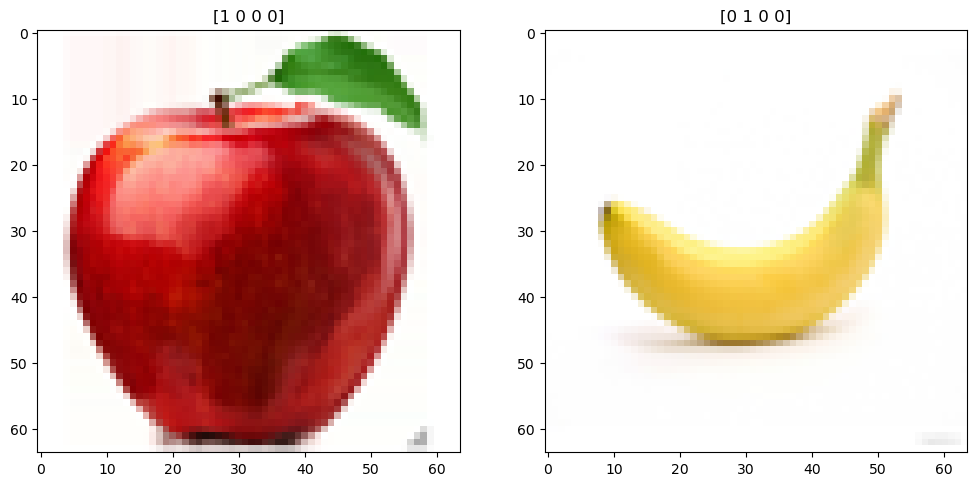

In [6]:
#viewing images
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].imshow(x_train[0])
ax[0].set_title(y_train[0])
ax[1].imshow(x_train[100])
ax[1].set_title(y_train[100])

plt.show()

In [12]:
#set up model1
model = tf.keras.Sequential()

#create Convolution Layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))

#create Flatten Layer
model.add(tf.keras.layers.Flatten())

#create Dense Layer
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

model.layers

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 32)        25632     
                                                                 
 flatten_1 (Flatten)         (None, 107648)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 430596    
                                                                 
Total params: 457,124
Trainable params: 457,124
Non-trainable params: 0
_________________________________________________________________


In [9]:

hist = model.fit(x=x_train/255, y=y_train, epochs=15)

Epoch 1/15
8/8 [==============================] - 3s 72ms/step - loss: 2.9215 - accuracy: 0.2208
Epoch 2/15
8/8 [==============================] - 0s 33ms/step - loss: 1.3353 - accuracy: 0.3333
Epoch 3/15
8/8 [==============================] - 0s 33ms/step - loss: 1.2042 - accuracy: 0.4125
Epoch 4/15
8/8 [==============================] - 0s 33ms/step - loss: 1.0587 - accuracy: 0.5417
Epoch 5/15
8/8 [==============================] - 0s 33ms/step - loss: 0.6274 - accuracy: 0.7833
Epoch 6/15
8/8 [==============================] - 0s 33ms/step - loss: 0.4592 - accuracy: 0.8542
Epoch 7/15
8/8 [==============================] - 0s 34ms/step - loss: 0.3996 - accuracy: 0.8708
Epoch 8/15
8/8 [==============================] - 0s 33ms/step - loss: 0.2305 - accuracy: 0.9125
Epoch 9/15
8/8 [==============================] - 0s 34ms/step - loss: 0.1574 - accuracy: 0.9792
Epoch 10/15
8/8 [==============================] - 0s 34ms/step - loss: 0.0887 - accuracy: 0.9792
Epoch 11/15
8/8 [============

In [10]:
#uploading x_test and y_test

img_path_test = "test/"

img_test_dict = {"apple": 95,
                "banana" : 94,
                "mixed" : 25,
                "orange" : 95
                }

x_test, y_test = datasetUpload(img_path_test, img_test_dict)

x_test = x_test.reshape(-1, 64, 64, 3)        

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
loss, accuracy = model.evaluate(x = x_test/255, y = y_test)
print("Loss: ", loss, "\tAccuracy: ", accuracy)

2/2 [==============================] - 1s 372ms/step - loss: 0.6510 - accuracy: 0.8667
Loss:  0.6510265469551086 	Accuracy:  0.8666666746139526


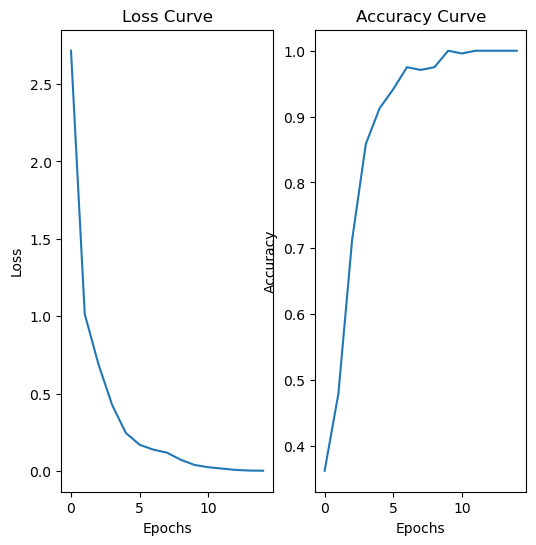

In [143]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()

# Introducing model 2 to improve accuracy

In [5]:
def process(img_path, resol):
    fruits = ['apple', 'banana', 'orange', 'mixed']
    one_hot = {
        'apple': [1, 0, 0, 0],
        'banana': [0, 1, 0, 0],
        'orange': [0, 0, 1, 0],
        'mixed': [0, 0, 0, 1]}

    train_label = []
    x_train = None
    y_train = []

    for fruit in fruits:
        count = 0
        for file_name in os.listdir(img_path):
            if file_name[0:len(fruit)] == fruit:
                img_raw = Image.open(img_path + '/' + file_name)
                img_rgb = img_raw.convert("RGB")
                img_tiny = img_rgb.resize((resol, resol))
                train_label.append([img_tiny, one_hot[fruit]])
                count += 1

        print(f'{fruit} count: {count}')

    random.shuffle(train_label)
    
    for i in train_label:
        if x_train is None:
            x_train = i[0]
        else:
            x_train = np.concatenate((x_train, i[0]))
        y_train.append(i[1])
    
    x_train = x_train.reshape(-1, resol, resol, 3)

    return x_train, np.array(y_train)


x_train, y_train = process(train_path, resol)
print(x_train.shape)

apple count: 76
banana count: 75
orange count: 76
mixed count: 20
(247, 64, 64, 3)


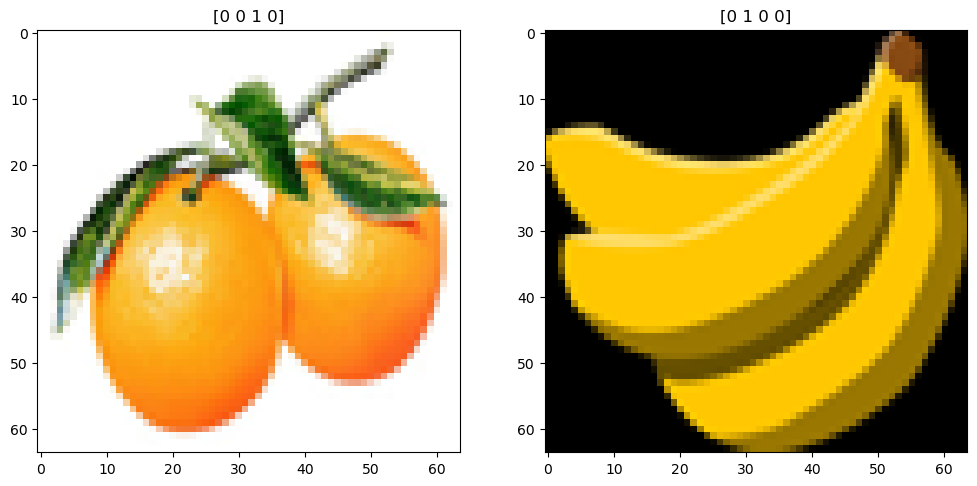

In [170]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].imshow(x_train[0])
ax[0].set_title(y_train[0])
ax[1].imshow(x_train[100])
ax[1].set_title(y_train[100])

plt.show()

In [197]:
#adding more layers 

modelmod = tf.keras.Sequential()

modelmod.add(tf.keras.layers.Conv2D(filters=30,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu',
                                 input_shape=(resol, resol, 3)))
modelmod.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))                                 
modelmod.add(tf.keras.layers.Conv2D(filters=30,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu'))
modelmod.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
modelmod.add(tf.keras.layers.Conv2D(filters=30,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu'))
modelmod.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
modelmod.add(tf.keras.layers.Conv2D(filters=30,
                                 kernel_size=(3, 3),
                                 padding='same',
                                 activation='relu'))
modelmod.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

modelmod.add(tf.keras.layers.Flatten())

modelmod.add(tf.keras.layers.Dense(units=200, activation='relu'))
modelmod.add(tf.keras.layers.Dropout(rate=0.4))
modelmod.add(tf.keras.layers.Dense(units=100, activation='relu'))

modelmod.add(tf.keras.layers.Dense(units=4, activation='softmax'))

modelmod.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

modelmod.summary()



Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_135 (Conv2D)         (None, 64, 64, 30)        840       
                                                                 
 max_pooling2d_130 (MaxPooli  (None, 32, 32, 30)       0         
 ng2D)                                                           
                                                                 
 conv2d_136 (Conv2D)         (None, 32, 32, 30)        8130      
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 16, 16, 30)       0         
 ng2D)                                                           
                                                                 
 conv2d_137 (Conv2D)         (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 8, 8, 30)       

In [198]:
hist = modelmod.fit(x_train/255, y_train, batch_size=30, epochs=25, shuffle=True, verbose=2)

Epoch 1/25
8/8 - 1s - loss: 1.3654 - accuracy: 0.3042 - 681ms/epoch - 85ms/step
Epoch 2/25
8/8 - 0s - loss: 1.2952 - accuracy: 0.3833 - 119ms/epoch - 15ms/step
Epoch 3/25
8/8 - 0s - loss: 1.2308 - accuracy: 0.5333 - 117ms/epoch - 15ms/step
Epoch 4/25
8/8 - 0s - loss: 0.9979 - accuracy: 0.6583 - 111ms/epoch - 14ms/step
Epoch 5/25
8/8 - 0s - loss: 0.8152 - accuracy: 0.7083 - 110ms/epoch - 14ms/step
Epoch 6/25
8/8 - 0s - loss: 0.5573 - accuracy: 0.7958 - 112ms/epoch - 14ms/step
Epoch 7/25
8/8 - 0s - loss: 0.4561 - accuracy: 0.8375 - 110ms/epoch - 14ms/step
Epoch 8/25
8/8 - 0s - loss: 0.3986 - accuracy: 0.8583 - 111ms/epoch - 14ms/step
Epoch 9/25
8/8 - 0s - loss: 0.3024 - accuracy: 0.8792 - 114ms/epoch - 14ms/step
Epoch 10/25
8/8 - 0s - loss: 0.3445 - accuracy: 0.8833 - 110ms/epoch - 14ms/step
Epoch 11/25
8/8 - 0s - loss: 0.2579 - accuracy: 0.9208 - 106ms/epoch - 13ms/step
Epoch 12/25
8/8 - 0s - loss: 0.3065 - accuracy: 0.8792 - 110ms/epoch - 14ms/step
Epoch 13/25
8/8 - 0s - loss: 0.2302 -

In [199]:
x_test, y_test = process(test_path, resol)

loss, accuracy = modelmod.evaluate(x=x_test/255, y=y_test)

print('loss =', loss)
print('accuracy =', accuracy)

apple count: 19
banana count: 18
orange count: 18
mixed count: 5
2/2 [==============================] - 0s 9ms/step - loss: 0.6809 - accuracy: 0.9167
loss = 0.6808925867080688
accuracy = 0.9166666865348816


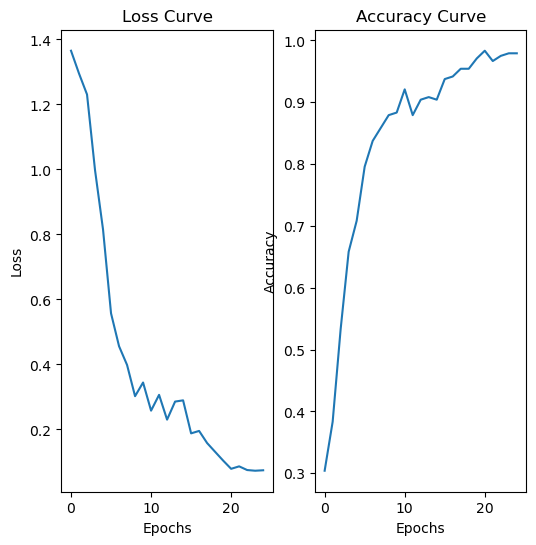

In [200]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()